# 📊 Module: Understanding Logistic Regression

**Subject**: ITELEC303 - Data Analytics with Python  
**Instructor**: Leonard Andrew Mesiera  

## 🎯 Learning Objectives
By the end of this module, you will be able to:
- Explain what logistic regression is and how it differs from linear regression
- Understand the concept of **classification** (Yes/No, Pass/Fail, etc.)
- Interpret the **logistic (sigmoid) function** and predicted probabilities
- Build and evaluate a logistic regression model in Python
- Apply logistic regression to real-world decision-making

> 💡 **Note**: Logistic regression is one of the most widely used tools in business, healthcare, and tech for making **binary decisions**.

## 🔁 Linear vs. Logistic Regression: What’s the Difference?

| **Linear Regression** | **Logistic Regression** |
|------------------------|--------------------------|
| Predicts a **continuous number** (e.g., salary, temperature) | Predicts a **category** (e.g., Yes/No, Spam/Not Spam) |
| Output: `y = mx + b` → any number | Output: **Probability** between 0 and 1 |
| Example: "How much will a house sell for?" | Example: "Will this customer **buy** or **not buy**?" |

👉 **Logistic regression is for classification**, not prediction of exact values.

## 🧠 The Big Idea: From Line to S-Curve (Sigmoid)

Instead of a straight line, logistic regression uses an **S-shaped curve** called the **sigmoid function**:

$$
\text{Probability} = \frac{1}{1 + e^{-(b_0 + b_1 x)}}
$$

- If probability ≥ 0.5 → predict **1** (e.g., "Yes")
- If probability < 0.5 → predict **0** (e.g., "No")

This turns a linear combination into a **probability**!

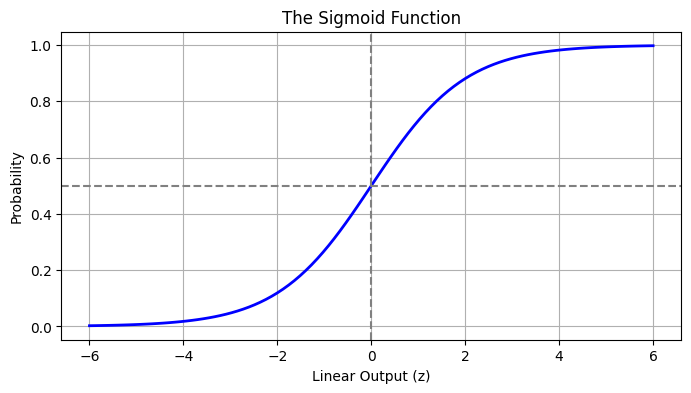

In [1]:
# Let's visualize the sigmoid function
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-6, 6, 100)
prob = sigmoid(z)

plt.figure(figsize=(8, 4))
plt.plot(z, prob, color='blue', linewidth=2)
plt.axhline(0.5, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title('The Sigmoid Function')
plt.xlabel('Linear Output (z)')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

## 🌟 Real-World Use Cases

Logistic regression is used everywhere:
- 🏥 **Healthcare**: Will this patient have heart disease? (Yes/No)
- 📧 **Email**: Is this message spam? (Spam/Not Spam)
- 💳 **Finance**: Will this customer default on a loan? (Default/No Default)
- 🛒 **Marketing**: Will this user click on an ad? (Click/No Click)

It’s simple, fast, interpretable—and often surprisingly accurate!

## 🛠️ Hands-On: Build a Logistic Regression Model

We’ll use a **sample dataset** about student exam results:
- `hours_studied`: How many hours the student studied
- `exam_result`: 1 = Passed, 0 = Failed

Goal: Predict whether a student will **pass or fail** based on study time.

In [2]:
# Create a small synthetic dataset
import pandas as pd

data = {
    'hours_studied': [1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 9],
    'exam_result':    [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)
df.head(10)

,hours_studied,exam_result
0,1,0
1,2,0
2,2,0
3,3,0
4,3,1
5,4,0
6,4,1
7,5,1
8,5,1
9,6,1


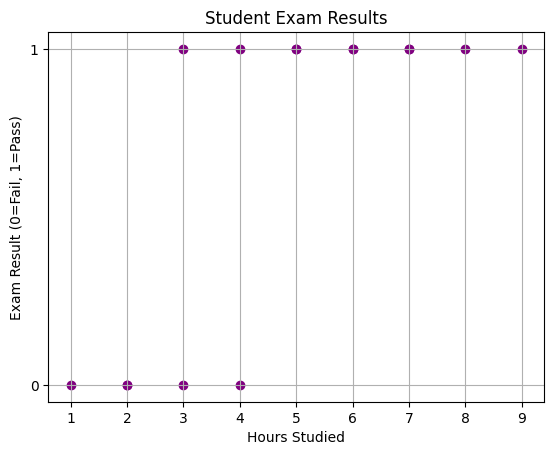

In [3]:
# Visualize the data
plt.scatter(df['hours_studied'], df['exam_result'], color='purple')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Result (0=Fail, 1=Pass)')
plt.title('Student Exam Results')
plt.yticks([0, 1])
plt.grid(True)
plt.show()

## 📈 Train the Logistic Regression Model

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Prepare features (X) and target (y)
X = df[['hours_studied']]  # Note: 2D array required
y = df['exam_result']

# Train the model
model = LogisticRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)
y_proba = model.predict_proba(X)[:, 1]  # Probability of passing

# Add predictions to dataframe
df['predicted'] = y_pred
df['probability_of_pass'] = y_proba

df

,hours_studied,exam_result,predicted,probability_of_pass
0,1,0,0,0.055668
1,2,0,0,0.157716
2,2,0,0,0.157716
3,3,0,0,0.372953
4,3,1,0,0.372953
5,4,0,1,0.653890
6,4,1,1,0.653890
7,5,1,1,0.857164
8,5,1,1,0.857164
9,6,1,1,0.950154


## 🔍 Interpret the Results

- If a student studies **2 hours**, the model says: ~20% chance of passing → **Predict: Fail**
- If a student studies **6 hours**, the model says: ~85% chance of passing → **Predict: Pass**

You can also see the **decision boundary** (where probability = 0.5):

C:\Users\Mae Raven Bonggay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


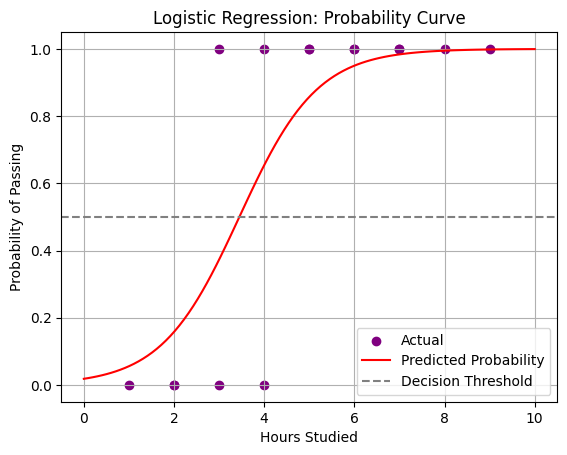

In [5]:
# Plot the logistic curve
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_prob = model.predict_proba(X_test)[:, 1]

plt.scatter(df['hours_studied'], df['exam_result'], color='purple', label='Actual')
plt.plot(X_test, y_prob, color='red', label='Predicted Probability')
plt.axhline(0.5, color='gray', linestyle='--', label='Decision Threshold')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression: Probability Curve')
plt.legend()
plt.grid(True)
plt.show()

## 📊 Model Evaluation

For classification, we use:
- **Accuracy**: % of correct predictions
- **Confusion Matrix**: Shows True/False Positives/Negatives
- **Classification Report**: Precision, Recall, F1-score

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred))
print("\nClassification Report:")
print(classification_report(y, y_pred))

Accuracy: 0.8666666666666667

Confusion Matrix:
[[4 1]
 [1 9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.90      0.90      0.90        10

    accuracy                           0.87        15
   macro avg       0.85      0.85      0.85        15
weighted avg       0.87      0.87      0.87        15



## 💡 Why Logistic Regression Matters to You

As a future data analyst or developer:
- It’s often the **first model** you’ll try for binary decisions
- It’s **transparent**: You can explain *why* a prediction was made (e.g., “More study time increases pass probability”)
- It’s fast, stable, and works well with small datasets
- It’s the foundation for more advanced models (like neural networks!)

> ✅ **Remember**: You don’t always need deep learning. Sometimes, a simple logistic regression is all you need!

## 🧪 Try It Yourself!

**Challenge**: What happens if you add another feature (e.g., `previous_score`)?

1. Create a new dataset with two features
2. Train a logistic regression model
3. Interpret the coefficients

This is your first step toward **multivariate classification**!

<hr>
<h1>Checking Linear Regression of Screentime and Followers.</h1>
<hr>

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Step 2: Generate a trendy synthetic dataset
np.random.seed(42)

n_samples = 300

screen_time = np.random.uniform(1, 8, n_samples)
followers = np.random.randint(50, 20000, n_samples)

prob_click = (
    0.2*screen_time + 
    0.00004*followers +
    np.random.normal(0, 0.3, n_samples)
)

clicked = (prob_click > 2.5).astype(int)

data = pd.DataFrame({
    'screen_time': screen_time,
    'followers': followers,
    'clicked': clicked
})

data.head()


,screen_time,followers,clicked
0,3.621781,926,0
1,7.655000,4192,0
2,6.123958,15252,0
3,5.190609,7016,0
4,2.092130,7129,0


In [17]:
X = data[['screen_time', 'followers']]
y = data['clicked']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Standardize both features so coefficients are comparable
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<h2>Checking Accuracy</h2>

In [18]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


<h2>Visualizing Data</h2>

       Feature  Coefficient
0  screen_time     1.495813
1    followers     1.307939


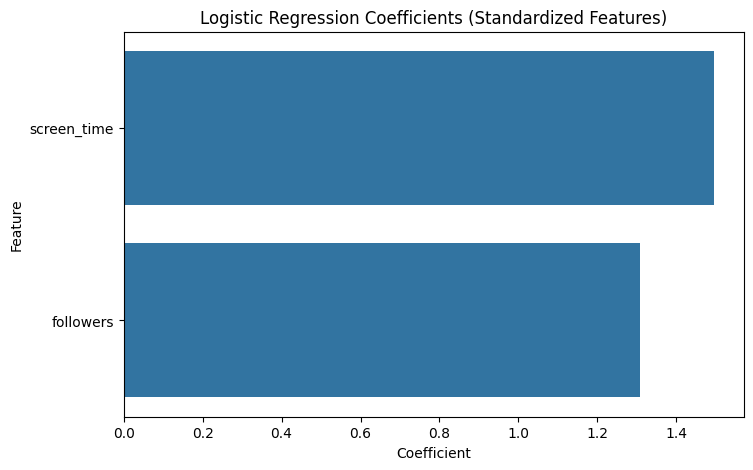

In [20]:
coeff_df = pd.DataFrame({
    "Feature": ["screen_time", "followers"],
    "Coefficient": log_reg.coef_[0]
})

print(coeff_df)

plt.figure(figsize=(8,5))
sns.barplot(x="Coefficient", y="Feature", data=coeff_df)
plt.title("Logistic Regression Coefficients (Standardized Features)")
plt.show()


<hr>
<h2>Insight 1</h2>
<p>Selecting screen_time and followers results to two key aspects of modern digital behavior: how active a user is and how socially connected they are. These factors strongly influence how people interact with online content, making them meaningful predictors of whether someone will click on a social-media ad. The graph showcases that the higher the screentime, the more user is influenced by social media.</p>

<h2>Insight 2</h2>
<p>This analysis is done because it mirrors how real platforms use behavioral data to predict engagement and personalize advertising. Understanding which users are more likely to click helps improve targeting and campaign efficiency, making the model highly relevant to today’s data-driven digital marketing environment.</p>

<hr>

## 📚 Summary

- Logistic regression predicts **probabilities** for **binary outcomes**
- It uses the **sigmoid function** to squash outputs between 0 and 1
- It’s **interpretable, fast, and widely used** in real-world analytics
- Always evaluate with **accuracy, confusion matrix, and business context**

Next: We’ll explore **multiclass classification** and **real datasets** (like predicting customer churn)!